# PageRank Algorithm

PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites

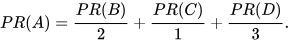

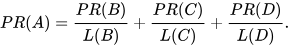


In the general case, the PageRank value for any page u can be expressed as:


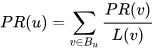

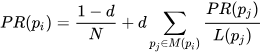

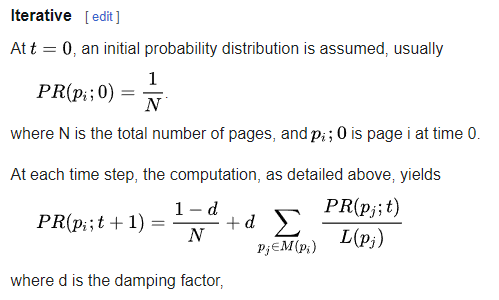


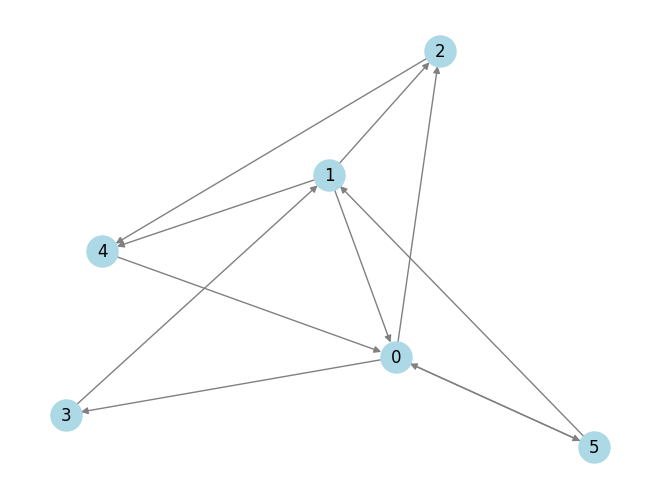

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

n = 6
p = 0.4
G = nx.erdos_renyi_graph(n, p, directed=True)

nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=12, edge_color='gray')

In [2]:
adj_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:\n", adj_matrix)

Adjacency Matrix:
 [[0 0 1 1 0 1]
 [1 0 1 0 1 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]]


In [3]:
def page_rank(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-6):
    num_nodes = len(graph)
    initial_pr = 1.0 / num_nodes
    page_rank = {node: initial_pr for node in graph}
    out_degrees = {node: len(graph[node]) for node in graph}

    for i in range(max_iterations):
        # print(f"Iteration : {i} ")
        # print(f"Page Rank : {page_rank}")
        prev_page_rank = page_rank.copy()
        total_diff = 0.0

        for node in graph:
            page_rank[node] = (1 - damping_factor) / num_nodes
            for neighbor in graph[node]:
                page_rank[node] += damping_factor * prev_page_rank[neighbor] / out_degrees[neighbor]

            diff = abs(page_rank[node] - prev_page_rank[node])
            total_diff += diff

        if total_diff < tolerance:
            break

    return page_rank

### Dangling Nodes Definition:
In a directed graph, a dangling node (or dangling vertex) is a node that has no outgoing edges. In the context of the PageRank algorithm, this means that there are nodes that do not link to any other nodes, which can disrupt the flow of PageRank across the network.

If a neighbor is a dangling node (i.e., has zero outgoing edges), the contribution to the current node's PageRank is calculated as:

    page_rank[node] += damping_factor * prev_page_rank[neighbor] / num_nodes

This means that instead of ignoring the dangling node, its entire PageRank is evenly distributed across all nodes. This ensures that the influence of the dangling node is still factored into the overall PageRank calculation.

In [4]:
def page_rank(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-06):
    num_nodes = len(graph)
    page_rank = {node: 1 / num_nodes for node in graph}
    prev_page_rank = page_rank.copy()
    out_degrees = {node: len(list(graph.successors(node))) for node in graph}

    for i in range(max_iterations):
        print(f"Iteration : {i} ")
        print(f"Page Rank : {page_rank}")
        for node in graph:
            page_rank[node] = (1 - damping_factor) / num_nodes

            for neighbor in graph.predecessors(node):
                if out_degrees[neighbor] > 0:
                    page_rank[node] += damping_factor * prev_page_rank[neighbor] / out_degrees[neighbor]
                else:
                    page_rank[node] += damping_factor * prev_page_rank[neighbor] / num_nodes

        diff = sum(abs(page_rank[node] - prev_page_rank[node]) for node in graph)
        if diff < tolerance:
            break

        prev_page_rank = page_rank.copy()

    return page_rank

In [5]:
page_rank(G)

Iteration : 0 
Page Rank : {0: 0.16666666666666666, 1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666}
Iteration : 1 
Page Rank : {0: 0.2847222222222222, 1: 0.2375, 2: 0.11944444444444445, 3: 0.07222222222222223, 4: 0.2138888888888889, 5: 0.07222222222222223}
Iteration : 2 
Page Rank : {0: 0.3047916666666667, 1: 0.11708333333333334, 2: 0.17296296296296296, 3: 0.10567129629629629, 4: 0.19381944444444446, 5: 0.10567129629629629}
Iteration : 3 
Page Rank : {0: 0.2678304398148148, 1: 0.15973090277777777, 2: 0.14453125, 3: 0.11135763888888889, 4: 0.20519212962962963, 5: 0.11135763888888889}
Iteration : 4 
Page Rank : {0: 0.29199739583333334, 1: 0.16698098958333335, 2: 0.14614238040123456, 3: 0.10088529128086421, 4: 0.19310865162037036, 5: 0.10088529128086421}
Iteration : 5 
Page Rank : {0: 0.27932988305362655, 1: 0.15362874638310187, 2: 0.15504387586805557, 3: 0.10773259548611111, 4: 0.19653230372299382, 5: 0.1077325954861

{0: 0.28280131253898055,
 1: 0.15903704183843886,
 2: 0.15018752821174422,
 3: 0.10512708542249424,
 4: 0.19771994656584801,
 5: 0.10512708542249424}

In [6]:
nx.pagerank(G)

{0: 0.28280213178641544,
 1: 0.15903674420299144,
 2: 0.15018772342398032,
 3: 0.10512691246172706,
 4: 0.19771957566315848,
 5: 0.10512691246172706}

In [7]:
graph = G

In [8]:
num_nodes = len(graph)
initial_pr = 1.0 / num_nodes
page_rank = {node: initial_pr for node in graph}
out_degrees = {node: len(graph[node]) for node in graph}

In [9]:
num_nodes

6

In [10]:
initial_pr

0.16666666666666666

In [11]:
page_rank

{0: 0.16666666666666666,
 1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666}

In [12]:
out_degrees

{0: 3, 1: 3, 2: 1, 3: 1, 4: 1, 5: 2}

# GOOGLE WEB GRAPH

In [13]:
import pandas as pd

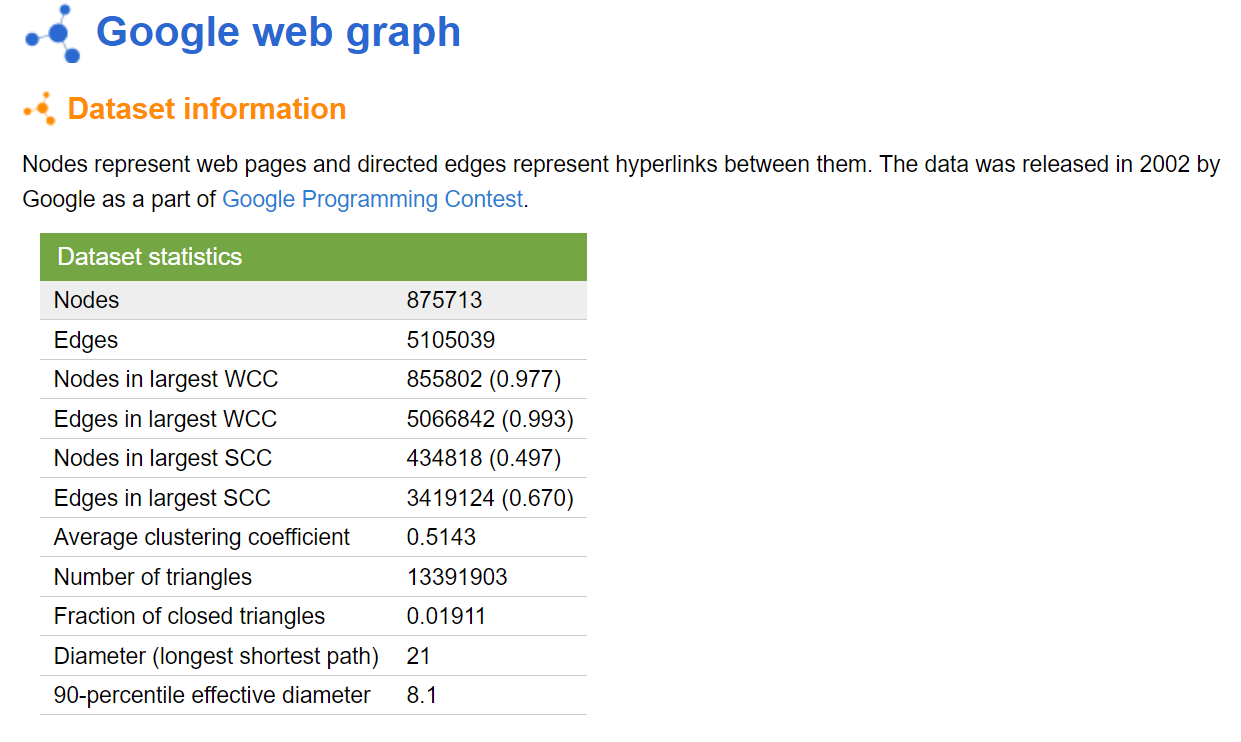

In [14]:
file_path = "/content/drive/MyDrive/DATA ANALYTICS LAB/Datasets/web-Google.txt"
edges = pd.read_csv(file_path, sep="\t", comment='#', header=None, names=['FromNodeId', 'ToNodeId'])

In [15]:
edges

,FromNodeId,ToNodeId
0,0,11342
1,0,824020
2,0,867923
3,0,891835
4,11342,0
...,...,...
5105034,916425,547323
5105035,916425,604833
5105036,916425,632916
5105037,916425,637936


In [16]:
edges.values

array([[     0,  11342],
       [     0, 824020],
       [     0, 867923],
       ...,
       [916425, 632916],
       [916425, 637936],
       [916425, 837379]])

In [17]:
G = nx.DiGraph()
G.add_edges_from(edges.values)

In [19]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_in_degree = sum(dict(G.in_degree()).values()) / num_nodes
avg_out_degree = sum(dict(G.out_degree()).values()) / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density of the graph: {density:.5f}")
print(f"Average in-degree: {avg_in_degree:.2f}")
print(f"Average out-degree: {avg_out_degree:.2f}")

Number of nodes: 875713
Number of edges: 5105039
Density of the graph: 0.00001
Average in-degree: 5.83
Average out-degree: 5.83


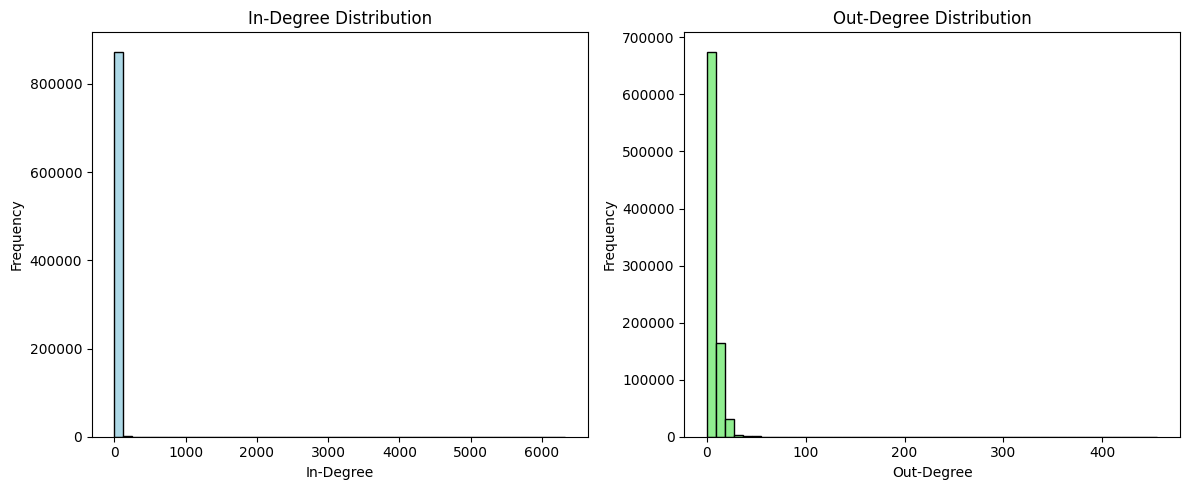

In [20]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(in_degrees.values(), bins=50, color='lightblue', edgecolor='black')
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(out_degrees.values(), bins=50, color='lightgreen', edgecolor='black')
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [21]:
sccs = list(nx.strongly_connected_components(G))
print(f"Number of strongly connected components: {len(sccs)}")

largest_scc = max(sccs, key=len)
print(f"Size of the largest strongly connected component: {len(largest_scc)}")

Number of strongly connected components: 371764
Size of the largest strongly connected component: 434818


In [22]:
pagerank_scores = nx.pagerank(G, alpha=0.85)
top_10_pagerank = sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)[:10]

print("\nTop 10 nodes by PageRank score:")
for node, score in top_10_pagerank:
    print(f"Node {node}: {score:.6f}")


Top 10 nodes by PageRank score:
Node 163075: 0.000952
Node 597621: 0.000901
Node 537039: 0.000895
Node 837478: 0.000876
Node 885605: 0.000822
Node 551829: 0.000790
Node 41909: 0.000779
Node 605856: 0.000779
Node 504140: 0.000746
Node 819223: 0.000710


In [23]:
pagerank_scores

{0: 2.7819912652138442e-05,
 11342: 3.109709290478732e-05,
 824020: 6.99821687995793e-06,
 867923: 3.122557250697715e-05,
 891835: 3.0402793851758616e-05,
 27469: 5.355357999418938e-06,
 38716: 1.1330042452174905e-05,
 309564: 3.0147209663648787e-06,
 322178: 2.6386574274350027e-06,
 387543: 2.6386574274350027e-06,
 427436: 5.069218169854887e-06,
 538214: 2.018331298992716e-06,
 638706: 2.0401423441484358e-06,
 645018: 2.300252953008882e-06,
 835220: 5.985654246719466e-06,
 856657: 2.4255529847157486e-06,
 91807: 5.810869168021512e-07,
 417728: 0.00017185877553696106,
 438493: 0.000364622788410584,
 500627: 6.949433948477269e-06,
 535748: 3.642396285683076e-06,
 695578: 5.852273496454551e-07,
 136593: 3.892928475126325e-06,
 414038: 3.5376523778613025e-06,
 523684: 2.702089033413015e-06,
 760842: 5.548494649218203e-06,
 815602: 2.7619790323480235e-06,
 846213: 2.384889840807817e-06,
 857527: 1.0837894662682296e-05,
 112028: 2.753552870015548e-06,
 235849: 2.710015815343469e-06,
 302284